In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
dir = "data/splits/train_test_val_split_0000/"
train_df = pd.read_csv(dir+"train.csv")
val_df = pd.read_csv(dir+"val.csv")
test_df = pd.read_csv(dir+"test.csv")

y_test = test_df.pop('Class')
x_test = test_df
y_train = train_df.pop('Class')
x_train = train_df
y_val = val_df.pop('Class')
x_val = val_df

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.fit_transform(x_val)
x_test = scaler.fit_transform(x_test)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [9]:
import tensorflow as tf
from tensorflow import keras
hln = 256
BATCH_SIZE=64
EPOCHS=50
# x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
model = tf.keras.Sequential([
    keras.layers.Dense(hln, activation='relu',input_shape=(x_train.shape[-1],)),
    keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=[
    keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc')
])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='categorical_accuracy',
    verbose=1,
    patience=100,
    mode='max',
    restore_best_weights=True)
from time import time
start = time()
baseline_history = model.fit(
    x_train,
    tf.one_hot(y_train, 3),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val, tf.one_hot(y_val, depth=3)),
    callbacks=[early_stopping])
stop = time()-start

Epoch 1/50
2243/2243 [==============================] - 5s 2ms/step - loss: 0.3672 - categorical_accuracy: 0.8748 - precision: 0.8970 - recall: 0.8467 - auc: 0.9649 - val_loss: 0.3395 - val_categorical_accuracy: 0.8838 - val_precision: 0.9047 - val_recall: 0.8585 - val_auc: 0.9693
Epoch 2/50
2243/2243 [==============================] - 4s 2ms/step - loss: 0.2905 - categorical_accuracy: 0.8996 - precision: 0.9125 - recall: 0.8872 - auc: 0.9764 - val_loss: 0.3166 - val_categorical_accuracy: 0.8911 - val_precision: 0.9054 - val_recall: 0.8713 - val_auc: 0.9727
Epoch 3/50
2243/2243 [==============================] - 3s 2ms/step - loss: 0.2753 - categorical_accuracy: 0.9064 - precision: 0.9177 - recall: 0.8947 - auc: 0.9785 - val_loss: 0.3047 - val_categorical_accuracy: 0.8958 - val_precision: 0.9115 - val_recall: 0.8799 - val_auc: 0.9744
Epoch 4/50
2243/2243 [==============================] - 4s 2ms/step - loss: 0.2654 - categorical_accuracy: 0.9095 - precision: 0.9201 - recall: 0.8990 - a

<ipython-input-11-c65f70c7ecd8>:31: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


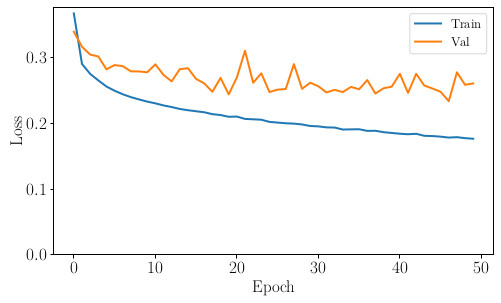

In [11]:
from scripts import *
import matplotlib as mpl
from matplotlib import pyplot as plt
history = baseline_history
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
mpl.rcParams['figure.figsize'] = (7.2,4.45)
metrics = ['loss', 'categorical_accuracy','precision','recall']
metric = metrics[0]
name = metric.replace("_"," ").capitalize()
plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
plt.plot(history.epoch, history.history['val_'+metric],
            color=colors[1], label='Val')
plt.xlabel('Epoch')
plt.ylabel(name)
if metric == 'loss':
    plt.ylim([0, plt.ylim()[1]])
elif metric == 'auc':
    plt.ylim([0.8,1])
else:
    plt.ylim([0,1])
plt.legend()
import matplotlib
matplotlib.use("pgf")
plt.style.use("style.txt")
matplotlib.rcParams.update({
    "pgf.texsystem": "xelatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False
})
plt.show()
plt.savefig(metric+".pgf")

In [24]:
baseline_history.history

{'loss': [0.366838276386261,
  0.29029861092567444,
  0.2751213312149048,
  0.2646045386791229,
  0.25638291239738464,
  0.2501786947250366,
  0.2437644600868225,
  0.23998163640499115,
  0.23649990558624268,
  0.23361141979694366,
  0.229915052652359,
  0.22744892537593842,
  0.225491002202034,
  0.22309723496437073,
  0.22129511833190918,
  0.21927735209465027,
  0.2176772952079773,
  0.21474488079547882,
  0.2130504995584488,
  0.2119855433702469,
  0.21008816361427307,
  0.20853276550769806,
  0.2066764235496521,
  0.20485703647136688,
  0.20321713387966156,
  0.20100931823253632,
  0.20178386569023132,
  0.1997273564338684,
  0.19792452454566956,
  0.1966574341058731,
  0.19653479754924774,
  0.19414515793323517,
  0.19289667904376984,
  0.1914997398853302,
  0.19064897298812866,
  0.18924562633037567,
  0.18923832476139069,
  0.18902195990085602,
  0.18736141920089722,
  0.18548928201198578,
  0.1841137856245041,
  0.1833600550889969,
  0.18305179476737976,
  0.18058547377586365,